# Projet Architecture Logicielle

*Fait par : Carina Faria Leitao, Emma Bulone et Rachid Boulkhir*

*Enseignant : Matthieu Falce*

In [2]:
#imports
import plotly.express as px
import pandas as pd
import numpy as np
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

# Présentation des données
Le jeu de données utilisé pour ce projet :

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv")
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


Sur le tableau de données ci-dessus , on peut voir les différentes variables utilisées dans notre dashboard :
- Date : Date à laquelle la personne a été déclarée positive au Covid-19
- Country : Le pays dans lequel la personne habite
- Confirmed : Nombre de cas positifs
- Recovered : Nombre de cas guéris
- Deaths : Nombre de décés

On a décidé de réaliser un dashboard permettent de visualiser ces données par pays et par période d'étude souhaitée.
La page est composée de 3 éléments :
 - Un tableau des données groupé par pays sur lequel on peut :
 
 Filtrer les données mais aussi sélectionner un pays et une colonne entre "Deaths","Confirmed" et "Recoverd" et le graphique en dessous se met alors à jour en conséquence
 Ce tableau possède également 2 colonnes réprésentants les taux de décés et de guérisons groupés par pays toujours.

 - Un graphique changeant selon la sélection évoquée au niveau du tableau dans lequel on retrouve la ou les courbes correspondantes à l'évolution du nombre de décés ou de guérisions pour le ou les pays sélectionnés dans le tableau.
On peut également choisir la période d'étude grâce aux deux cases situées près du graphique dans lesquelles on peut mettre une date de début et une date de fin.
Le graphique se mettra à jour en conséquence des dates choisies, de la variable choisie (guérisons ou décés) au sein du tableau ainsi que du/des pays choisis au niveau de la carte.

- Une carte sur laquelle on peut voir le nombre de décés avec une échelle selon laquelle au plus la couleur est foncée au plus le nombre de décés est important. Sur cette carte il est possible de selectionner un ou plusieurs pays ce qui permet d'avoir une vision sur une liste restreinte de pays avec le graphique du nombre de décés/gueris qui se mettra alors à jour.




# Les difficultés rencontrées et solutions apportées durant la conception



Au cours du projet, nous avons rencontré quelques difficultés:

- Tout d'abord, dans la réalisation de la carte du monde afin que tous les pays soient bien reconnus, on a du trouver pour chaque pays son code ISO3. 
Pour cela on a créé un dictionnaire python qui permet d'associer le libellé du pays à son code ISO3.

- De plus, dans la carte, au niveau de l'échelle, il a fallu l'adapter puisqu'elle n'était pas représentative du nombre réel de décés. Par exemple, lors de l'affichage du nombre de décés dans chaque pays, le nombre de décés aux Etats-Unis par rapport à sa population totale est complétement différents du nombre de décés en France par rapport à sa population totale.
Pour corriger cette mauvaise représentation, nous avons decidé de passer au log. Dans la carte les données sont alors passées au log par contre l'échelle est quand à elle est basée sur les valeurs réelles.

- Nous avons eu des difficultés pour garder une échelle en valeurs réelles alors que la carte était passée au log. 
En effet, par défaut la librairie python met des valeurs passées au log comme sur la carte.
Les manipulations pour corriger l'échelle et la remettre en valeur réelle a été assez complexe à cause du manque d'information dans la documentation de la librairie python (plotly).

Une autre solution à ce problème d'échelle serait de réaliser une échelle sur laquelle on retrouve plutôt un taux de décés(nombre de décés/population totale du pays).

- Pour la fonctionnalité "sélection des pays sur la carte", nous avons constaté un disfonctionnement qui pour nous provient de la librairie plotly. 
En effet, lorsque nous essayons de selectionner un pays et tout de suite après on souhaite le déselectionner, cela ne fonctionne pas.
La seule manière de désélectionner un pays sélectionné est de sélectionner un autre pays et ensuite de recliquer sur la pays que l'on souhaitait désélectionner.

- Nous avons rencontrés également une petite difficulté lorsque nous sélectionnons une période à filtrer avec les input de dates nous ne pouvons plus sélectionner une ligne du tableau


# Présentation de notre Dashboard



### Le tableau

In [4]:
# Group by pour le tableau
df_table=(df.groupby('Country')
    .agg({'Confirmed':'sum', 'Recovered': 'sum','Deaths':'sum'})
    .reset_index())

df_table['% Recovered']=(100*(df_table['Recovered']/df_table['Confirmed'])).map('{:,.2f} %'.format)
df_table['% Deaths']=(100*(df_table['Deaths']/df_table['Confirmed'])).map('{:,.2f} %'.format)

df_table

,Country,Confirmed,Recovered,Deaths,% Recovered,% Deaths
0,Afghanistan,18697687,14661995,735510,78.42 %,3.93 %
1,Albania,22417004,16539333,424998,73.78 %,1.90 %
2,Algeria,30321708,20795483,905241,68.58 %,2.99 %
3,Andorra,2655485,2433642,34640,91.65 %,1.30 %
4,Angola,5484924,4274145,132667,77.93 %,2.42 %
...,...,...,...,...,...,...
189,Vietnam,807187,560262,11313,69.41 %,1.40 %
190,West Bank and Gaza,48028298,43056695,510803,89.65 %,1.06 %
191,Yemen,1098378,579219,264342,52.73 %,24.07 %
192,Zambia,15609926,14536752,233136,93.13 %,1.49 %


Il était pour nous nécéssaire de créer les deux indicateurs taux de décés et taux de guérisons. En effet, en voyant uniquement les volumes de décés ou de guérisons, on n'a du mal à se rendre compte de l'ampleur du phénomène et il est difficile de comparer deux pays entre eux sans ce rapporter à la taille de population de chacun des deux pays.

Sur le tableau dans l'application, en haut de chaque colonne il est possible de filter et trier les données.

### Le graphique

In [5]:
fig_default = px.line(df, x='Date', y=df["Deaths"], color=df["Country"] )
fig_default.show()

Il nous a semblait interressant de laisser libre choix à l'utlisateur de la vision qu'il souhaite étudiée : vision décés ou vision guérisons, quel pays il souhaite étudié et enfin sur quelle période il choisi d'observer l'évolution.

Vous pouvez voir ci dessous, les deux input qui permettent la selection de la période:

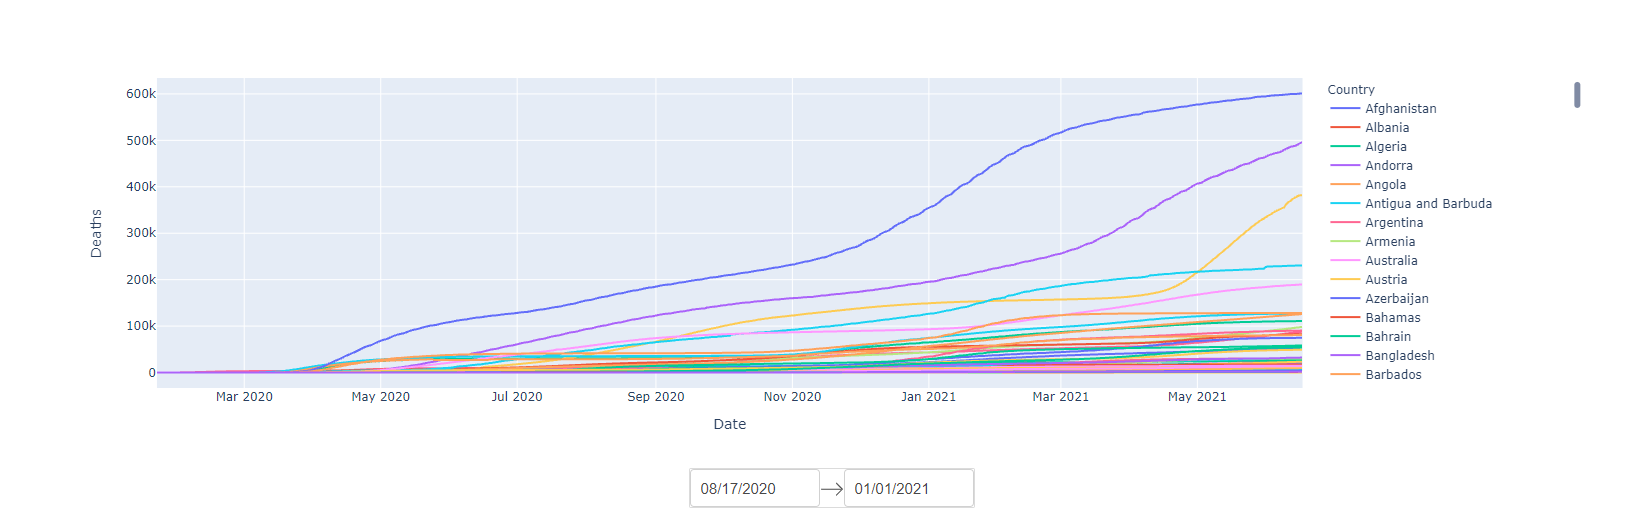

Lorsque vous entrez une date de début et de fin dans ces input le graphique se met à jour mais la carte se met elle aussi à jour en conséquence.
Par exemple, entre le 01/01/20 et 31/01/20 on ne retrouve que des données sur la Chine.

En effet, la Covid-19 n'était présente qu'en Chine sur cette période.

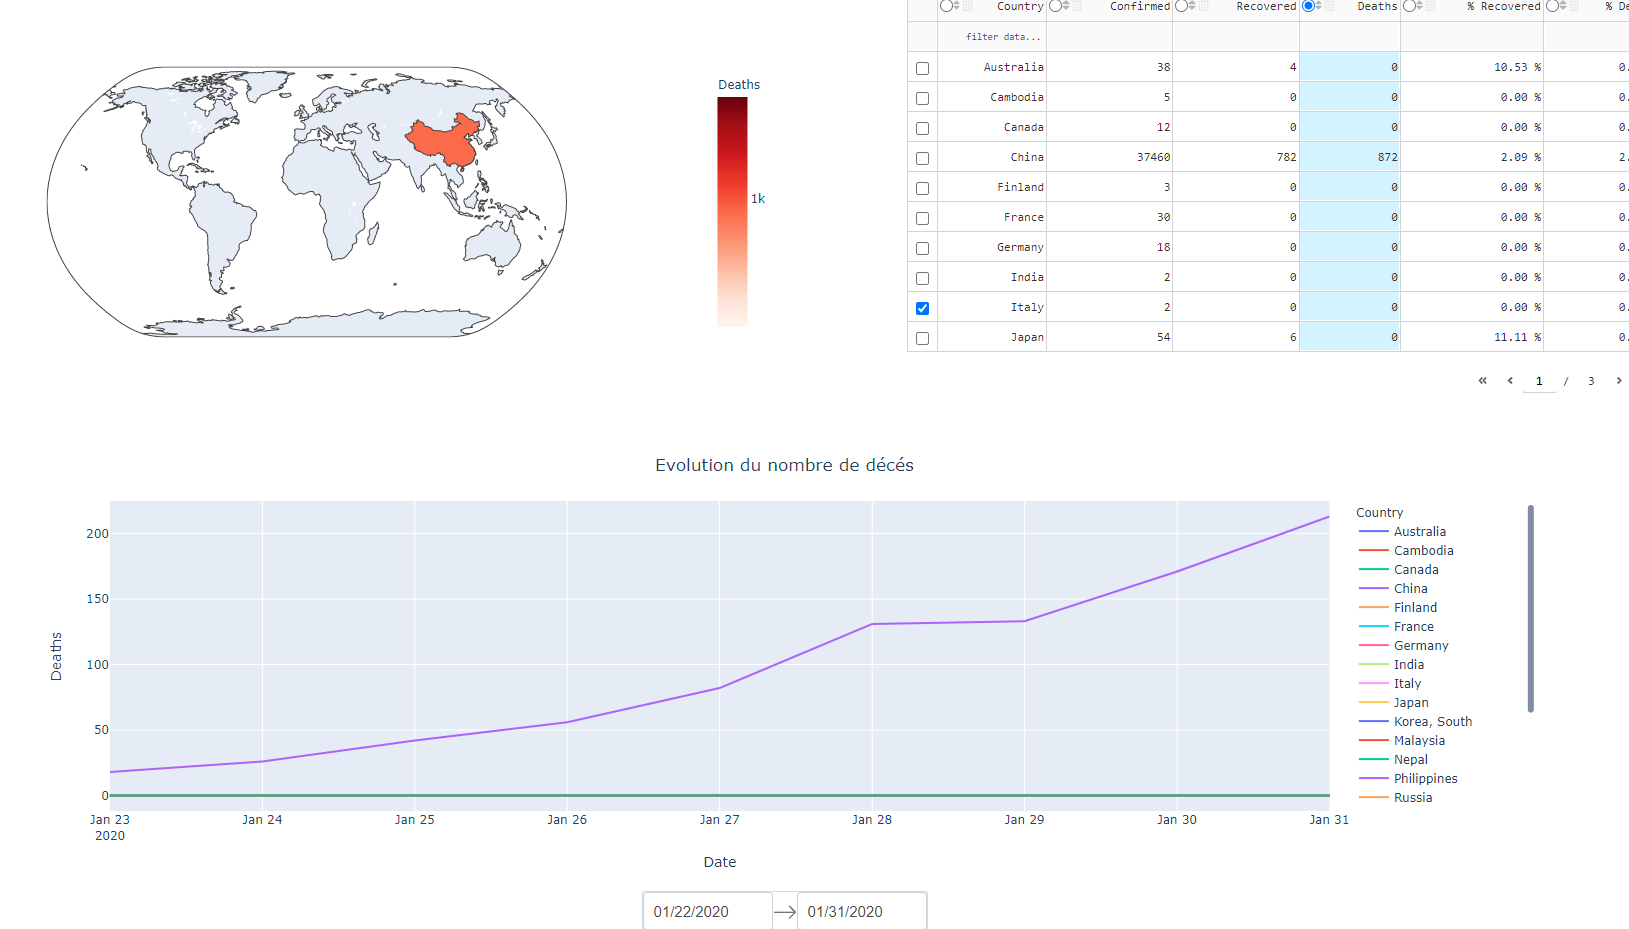

### La carte

Dans notre application, il est possible de selectionner un ou plusieurs pays comme évoqué précédemment avec le graphique qui se mettra alors à jour.
Nous expliciterons comment nous avons développé cette partie intéractive dans la partie intéractivité du blog.

In [6]:
class smart_dict(dict):
    def __missing__(self, key):
        return key


dict_to_iso_alpha =  {'Afghanistan': 'AFG', 'Albania': 'ALB', 'Algeria': 'DZA','Andorra':'AND', 'Angola': 'AGO', 'Antigua and Barbuda':'ATG',
        'Argentina': 'ARG','Armenia':'ARM', 'Australia': 'AUS',
        'Austria': 'AUT', 'Azerbaijan':'AZE','Bahamas':'BHS', 'Bahrain': 'BHR', 'Bangladesh': 'BGD','Barbados':'BRB',
        'Belarus':'BLR','Belgium': 'BEL','Belize':'BLZ', 'Benin': 'BEN','Bhutan':'BTN', 'Bolivia': 'BOL',
        'Bosnia and Herzegovina': 'BIH', 'Botswana': 'BWA', 'Brazil': 'BRA','Brunei':'BRN','Bulgaria': 'BGR', 
        'Burma':'MMR','Burkina Faso': 'BFA',
        'Burundi': 'BDI','Cabo Verde':'CPV', 'Cambodia': 'KHM', 'Cameroon': 'CMR', 'Canada': 'CAN', 'Central African Republic': 'CAF',
        'Chad': 'TCD', 'Chile': 'CHL', 'China': 'CHN', 'Colombia': 'COL', 'Comoros': 'COM', 'Congo (Kinshasa)': 'COD',
        'Congo (Brazzaville)': 'COG', 'Costa Rica': 'CRI', "Cote d'Ivoire": 'CIV', 'Croatia': 'HRV', 'Cuba': 'CUB','Cyprus':'CYP',
        'Czechia': 'CZE', 'Denmark': 'DNK', 'Dominica':'DMA','Djibouti': 'DJI', 'Dominican Republic': 'DOM', 'Ecuador': 'ECU',
        'Egypt': 'EGY', 'El Salvador': 'SLV', 'Equatorial Guinea': 'GNQ', 'Eritrea': 'ERI', 'Estonia':'EST','Ethiopia': 'ETH',
        'Eswatini':'SWZ','Fiji':'FJI','Georgia':'GEO','Grenada':'GRD','Guyana':'GUY',
        'Finland': 'FIN', 'France': 'FRA', 'Gabon': 'GAB', 'Gambia': 'GMB', 'Germany': 'DEU', 'Ghana': 'GHA',
        'Greece': 'GRC', 'Guatemala': 'GTM', 'Guinea': 'GIN', 'Guinea-Bissau': 'GNB', 'Haiti': 'HTI', 'Holy See':'VAT',
        'Honduras': 'HND',
        'Hong Kong, China': 'HKG', 'Hungary': 'HUN', 'Iceland': 'ISL', 'India': 'IND', 'Indonesia': 'IDN', 'Iran': 'IRN',
        'Iraq': 'IRQ', 'Ireland': 'IRL', 'Israel': 'ISR', 'Italy': 'ITA', 'Jamaica': 'JAM', 'Japan': 'JPN', 'Jordan': 'JOR',
        'Kazakhstan':'KAZ',
        'Kenya': 'KEN', 'Kiribati':'KIR','Korea, Dem. Rep.': 'PRK', 'Korea, South': 'KOR', 'Kosovo':'XXK','Kyrgyzstan':'KGZ',
        'Kuwait': 'KWT','Laos':'LAO' ,'Latvia':'LVA','Lebanon': 'LBN', 'Lesotho': 'LSO',
        'Liberia': 'LBR', 'Libya': 'LBY','Liechtenstein':'LIE','Lithuania':'LTU', 'Luxembourg':'LUX',
        'Madagascar': 'MDG', 'Malawi': 'MWI', 'Malaysia': 'MYS', 'Maldives':'MDV','Mali': 'MLI','Malta':'MLT','Marshall Islands':'MHL',
        'Mauritania': 'MRT', 'Mauritius': 'MUS', 'Mexico': 'MEX', 'Mongolia': 'MNG', 'Montenegro': 'MNE', 'Morocco': 'MAR',
        'Mozambique': 'MOZ', 'Myanmar': 'MMR', 'Namibia': 'NAM', 'Nepal': 'NPL', 'Netherlands': 'NLD', 'New Zealand': 'NZL',
        'Nicaragua': 'NIC', 'Niger': 'NER', 'Nigeria': 'NGA', 'Norway': 'NOR', 'Oman': 'OMN', 'Pakistan': 'PAK', 'Panama': 'PAN',
        'Paraguay': 'PRY', 'Peru': 'PER', 'Philippines': 'PHL', 'Poland': 'POL', 'Portugal': 'PRT', 'Puerto Rico': 'PRI','Qatar':'QAT',
        'Reunion': 'REU', 'Romania': 'ROU', 'Russia':'RUS','Rwanda': 'RWA', 'Sao Tome and Principe': 'STP', 'Saudi Arabia': 'SAU',
        'Senegal': 'SEN', 'Serbia': 'SRB', 'Sierra Leone': 'SLE', 'Singapore': 'SGP', 'Slovak Republic': 'SVK',
        'Slovenia': 'SVN', 'Somalia': 'SOM', 'South Africa': 'ZAF', 'Spain': 'ESP', 'Sri Lanka': 'LKA', 'Sudan': 'SDN',
        'Swaziland': 'SWZ', 'Sweden': 'SWE', 'Switzerland': 'CHE', 'Syria': 'SYR', 'Taiwan': 'TWN', 'Tanzania': 'TZA',
        'Thailand': 'THA', 'Togo': 'TGO', 'Trinidad and Tobago': 'TTO', 'Tunisia': 'TUN', 'Turkey': 'TUR', 'Uganda': 'UGA',
        'United Kingdom': 'GBR', 'United Arab Emirates': 'ARE','US': 'USA', 'Uruguay': 'URY', 'Venezuela': 'VEN', 'Vietnam': 'VNM',
        'West Bank and Gaza': 'PSE', 'Yemen': 'YEM', 'Zambia': 'ZMB', 'Zimbabwe': 'ZWE',

        'Micronesia':'FSM','Moldova':'MDA','Monaco':'MCO','North Macedonia':'MKD','Papua New Guinea':'PNG',
        'Saint Kitts and Nevis':'KNA','Saint Lucia':'LCA','Saint Vincent and the Grenadines':'VCT',
        'Samoa':'WSM','Vanuatu':'VUT','San Marino':'SMR', 'Seychelles':'SYC', 
        'Slovakia':'SVK', 'Solomon Islands':'SLB', 'South Sudan':'SSD', 'Suriname':'SUR', 
        'Taiwan*':'TWN', 'Tajikistan':'TJK', 'Timor-Leste':'TLS', 'Ukraine':'UKR', 
        'Uzbekistan':'UZB', 'Vanuatu':'VUT'
        
        }

df__ = df.groupby(["Country"]).sum()
df__["Country"] = df__.index
df__["ISO alpha-3"] = df__["Country"].map(smart_dict(dict_to_iso_alpha))
df__["Deaths in log10"] = np.log10(df__["Deaths"])

ticks = np.arange(2, 8.1, 1)
fig_choropleth = go.Figure(data=go.Choropleth(
                    locations=df__["Country"].map(dict_to_iso_alpha),
                    text=df__["Country"],
                    hoverinfo='text',
                    z=df__["Deaths in log10"],
                    colorbar_tickvals=ticks,
                    colorbar_title="Décès",
                    colorscale="reds",
                    colorbar_ticktext=[ "100" if p<3 else "{:d}k".format( int((10**(p-3))) ) if p<6 else "{:d}M".format( int((10**(p-6))) ) for p in ticks] ) )
fig_choropleth.update_geos(projection_type="natural earth")
fig_choropleth.show()

# Intéractivité de l'application

Pour avoir le code plus détaillé sur cette partie intéractivité, nous vous invitions à vous rendre dans le code source de l'applicaton.

## 1ère fonctionnalité intéractive : Sélection des pays sur la carte



```
@app.callback(
    Output('datatable-interactivity', 'selected_rows'),
    Output('map', 'figure'),
    [Input("map", "clickData")]
)
def update_map(clickData):
    ...
    return list(selections), fig_choropleth
```



La fonction ci-dessus prend en entrée les pays sélectionnés sur la carte qui se trouvent dans l'objet 'clickData' . Ensuite, en sortie on a la carte mise à jour ainsi qu'une sélection des pays sélectionnées sur la carte qui est faite au niveau du tableau.

## 2e fonctionnalité intéractive : Sélection de la colonne souhaitée pour le graphique au niveau du tableau



```
def update_graph(selected_rows, selected_columns):
 ...
    return px.line(_df, x='Date', y=_df[selected_column], color=_df["Country"], title="Evolution du nombre de décés")
```



Cette fonction prend en paramètre les lignes (correspondantes au pays) sélectionnées dans le tableau ou sur la carte. 

En effet, l'utilisateur a la possibilité de sélectionner un pays directement sur le tableau ou bien de choisir des pays sur le map. Dés lors où l'utilisateur clique sur un pays du map, ce pays est alors coché au niveau du tableau.

Enfin, l'utilisateur peut également sélectionner une des 2 colonnes (Deaths et Recovered) qu'il souhaite observer sur le graphique.

Ensuite, la fonction renvoie le graphique mis à jour avec les paramètres (pays et variables ) demandés par l'utilisateur.